# Summarising Data
In this lecture we will look at summarising data in Pandas. The dataset we will be using contains information about domestic flights in Australia. The import is provided below.

In [1]:
import pandas as pd
flights = pd.read_csv('Data/domestic_flights.csv')
flights

,City1,City2,Month,Passenger_Trips,Aircraft_Trips,Route_Distance,Seats
0,ADELAIDE,ALICE SPRINGS,Jan-84,15743,143,1316,19246
1,ADELAIDE,BRISBANE,Jan-84,3781,32,1622,4210
2,ADELAIDE,CANBERRA,Jan-84,1339,12,972,1414
3,ADELAIDE,DARWIN,Jan-84,3050,33,2619,4566
4,ADELAIDE,GOLD COAST,Jan-84,1596,16,1607,1803
...,...,...,...,...,...,...,...
25962,SYDNEY,WAGGA WAGGA,Apr-22,11318,326,367,17244
25963,SYDNEY,WAGGA WAGGA,May-22,12278,351,367,18599
25964,SYDNEY,WAGGA WAGGA,Jun-22,12119,338,367,18116
25965,SYDNEY,WAGGA WAGGA,Jul-22,12863,415,367,20302


In [2]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25967 entries, 0 to 25966
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City1            25967 non-null  object
 1   City2            25967 non-null  object
 2   Month            25967 non-null  object
 3   Passenger_Trips  25967 non-null  int64 
 4   Aircraft_Trips   25967 non-null  int64 
 5   Route_Distance   25967 non-null  int64 
 6   Seats            25967 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 1.4+ MB


## Datetime Data
We can see that the dataframe has a 'Month' column that contains datetime information. By default, this is imported as an object (ie. string). We can instead import this as a datetime variable, which means we can easily extract features from the date (eg. month, year). This also means Python will order by Month chonologically rather than alphabetically.

In [5]:
flights = pd.read_csv('Data/domestic_flights.csv', parse_dates = ['Month'], date_format = '%b-%y')
flights

,City1,City2,Month,Passenger_Trips,Aircraft_Trips,Route_Distance,Seats
0,ADELAIDE,ALICE SPRINGS,1984-01-01,15743,143,1316,19246
1,ADELAIDE,BRISBANE,1984-01-01,3781,32,1622,4210
2,ADELAIDE,CANBERRA,1984-01-01,1339,12,972,1414
3,ADELAIDE,DARWIN,1984-01-01,3050,33,2619,4566
4,ADELAIDE,GOLD COAST,1984-01-01,1596,16,1607,1803
...,...,...,...,...,...,...,...
25962,SYDNEY,WAGGA WAGGA,2022-04-01,11318,326,367,17244
25963,SYDNEY,WAGGA WAGGA,2022-05-01,12278,351,367,18599
25964,SYDNEY,WAGGA WAGGA,2022-06-01,12119,338,367,18116
25965,SYDNEY,WAGGA WAGGA,2022-07-01,12863,415,367,20302


In [6]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25967 entries, 0 to 25966
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   City1            25967 non-null  object        
 1   City2            25967 non-null  object        
 2   Month            25967 non-null  datetime64[ns]
 3   Passenger_Trips  25967 non-null  int64         
 4   Aircraft_Trips   25967 non-null  int64         
 5   Route_Distance   25967 non-null  int64         
 6   Seats            25967 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 1.4+ MB


Now we would you like you to create the computed columns detailed below. The last two will require you to access datetime methods/attributes.
* Passenger load factor - describes the percentage of seats filled.
* Monthly distance - describes the total distance flown for that month.
* Month name
* Year

In [11]:
# insert code here to add new columns
flights['PLF'] = flights.Passenger_Trips / flights.Seats * 100
flights['Total_Distance'] = flights.Aircraft_Trips * flights.Route_Distance
flights['Month_Name'] = flights.Month.dt.month_name()
flights['Year'] = flights.Month.dt.year
flights

,City1,City2,Month,Passenger_Trips,Aircraft_Trips,Route_Distance,Seats,PLF,Total_Distance,Month_Name,Year
0,ADELAIDE,ALICE SPRINGS,1984-01-01,15743,143,1316,19246,81.798815,188188,January,1984
1,ADELAIDE,BRISBANE,1984-01-01,3781,32,1622,4210,89.809976,51904,January,1984
2,ADELAIDE,CANBERRA,1984-01-01,1339,12,972,1414,94.695898,11664,January,1984
3,ADELAIDE,DARWIN,1984-01-01,3050,33,2619,4566,66.798073,86427,January,1984
4,ADELAIDE,GOLD COAST,1984-01-01,1596,16,1607,1803,88.519135,25712,January,1984
...,...,...,...,...,...,...,...,...,...,...,...
25962,SYDNEY,WAGGA WAGGA,2022-04-01,11318,326,367,17244,65.634424,119642,April,2022
25963,SYDNEY,WAGGA WAGGA,2022-05-01,12278,351,367,18599,66.014302,128817,May,2022
25964,SYDNEY,WAGGA WAGGA,2022-06-01,12119,338,367,18116,66.896666,124046,June,2022
25965,SYDNEY,WAGGA WAGGA,2022-07-01,12863,415,367,20302,63.358290,152305,July,2022


## Aggregates
Last week you looked at how to perform simple aggregates. This week you will explore problems that require more advanced aggregation techniques, such as grouped aggregates and custom aggregates.

Use aggregation to answer the question below:

In [14]:
# What is the total distance flown by all aircraft in the data?
print(f'The total distance flown in the data was {flights.Total_Distance.sum()} km')

The total distance flown in the data was 11488294925 km


The total distance flown by all flights in the data was 11488294925 km.

In [21]:
# What are the 5 most popular flight routes in the dataframe by total passenger trips?
flights.groupby(['City1', 'City2']).Passenger_Trips.sum().sort_values(ascending=False).head(5)

City1       City2    
MELBOURNE   SYDNEY       210735763
BRISBANE    SYDNEY       124800863
            MELBOURNE     75661129
GOLD COAST  SYDNEY        60226416
ADELAIDE    MELBOURNE     58848582
Name: Passenger_Trips, dtype: int64

In [24]:
# What is the newest flight route in the data?
flights.groupby(['City1', 'City2']).Month.min().sort_values().tail(1)

City1     City2 
ADELAIDE  CAIRNS   2021-06-01
Name: Month, dtype: datetime64[ns]

The newest flight route in the data was from Adelaide to Cairns, which started in June 2021.

In [27]:
# What is the mean and standard deviation of passenger load factor?
flights.PLF.agg(['mean', 'std'])

mean    72.618756
std     11.292801
Name: PLF, dtype: float64

In [30]:
# In what years was passenger load factor at its lowest?
flights.groupby('Year').PLF.mean().sort_values().head()

Year
2021    55.473236
2020    60.712487
1996    69.186924
1997    69.321614
1995    69.648895
Name: PLF, dtype: float64

In [33]:
flights.groupby('Year').PLF.mean()

Year
1984    70.691747
1985    70.846119
1986    70.980515
1987    72.020755
1988    75.190585
1989    71.766685
1990    69.711668
1991    71.275803
1992    73.378428
1993    74.758200
1994    72.896157
1995    69.648895
1996    69.186924
1997    69.321614
1998    69.900877
1999    71.161378
2000    71.428615
2001    72.699077
2002    73.670245
2003    75.588613
2004    75.014023
2005    74.375333
2006    76.081379
2007    78.798528
2008    77.363729
2009    77.518855
2010    76.493819
2011    76.444153
2012    74.875937
2013    72.494301
2014    72.396856
2015    71.902505
2016    72.159583
2017    73.946034
2018    75.497582
2019    75.369758
2020    60.712487
2021    55.473236
2022    72.576652
Name: PLF, dtype: float64

<Axes: xlabel='Year'>

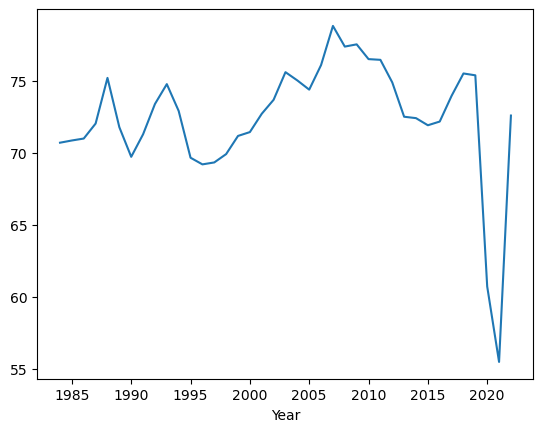

In [32]:
PLF_by_year = flights.groupby('Year').PLF.mean()
PLF_by_year.plot()

## Visuals
In pandas you can visualise data with the <code>plot</code> method. This method has lots of potential arguments which can be found here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html. The main ones to consider when starting out are:

<code>x</code>: this is a label that describes what column of the dataframe goes on the x-axis of the plot. Defaults to the index of the series/dataframe.

<code>y</code>: this is a label that describes what column of the dataframe foes on the y-axis of the plot. Defaults to all columns of the series/dataframe.

<code>kind</code>: this is a string describing what type of plot to create. Some notable types are given below:
* 'line' (default)
* 'bar'
* 'barh'
* 'hist'
* 'box'
* 'kde' / 'density'
* 'pie'
* 'scatter'

Use data visuals to answer the following questions:
* How do the total number of passenger trips and seats vary for each month vary with time in the data?
* What percentage of annual flights come in each month of the year?
* What is the relationship between passenger trips and aircraft trips?
* How many people flew on each Brisbane route in 2018?

<Axes: xlabel='Month'>

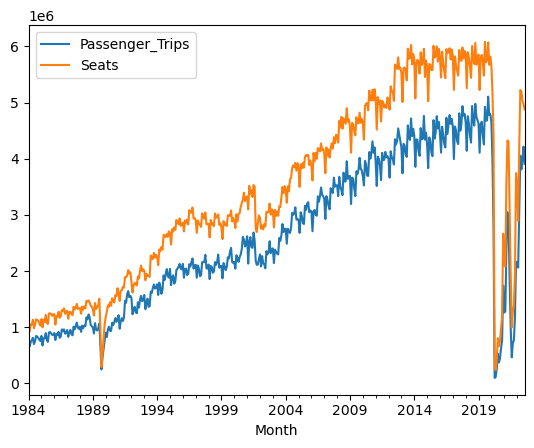

In [41]:
# How do the total number of passenger trips and seats vary for each month vary with time in the data?
totals_by_month = flights.groupby('Month')[['Passenger_Trips', 'Seats']].sum()
totals_by_month.plot()

<Axes: xlabel='Passenger_Trips', ylabel='Seats'>

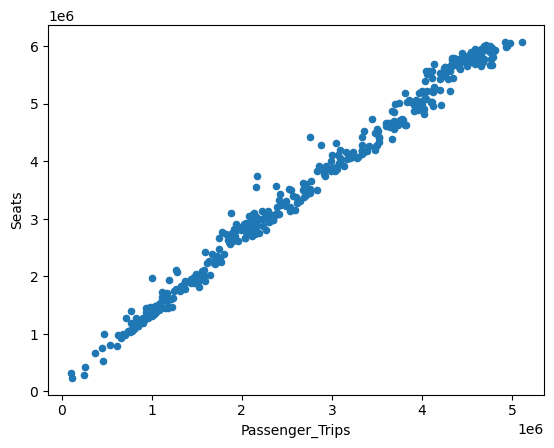

In [43]:
# looking at correlation - need to specify arguments now
totals_by_month.plot(x = 'Passenger_Trips', y = 'Seats', kind='scatter')

In [36]:
totals_by_month

,Passenger_Trips,Seats
Month,,
1984-01-01,800530,1097007
1984-02-01,660289,933892
1984-03-01,739785,1048449
1984-04-01,770776,1051793
1984-05-01,813317,1134710
...,...,...
2022-04-01,4053622,5222135
2022-05-01,3809830,5196622
2022-06-01,3990223,5028865


/tmp/ipykernel_186/4143905851.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  flights_by_month = flights.groupby('Month_Name').Aircraft_Trips.sum()


<Axes: ylabel='Aircraft_Trips'>

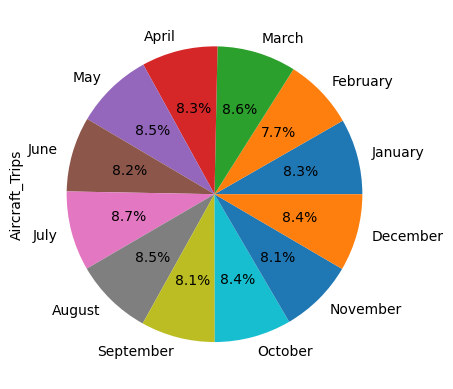

In [52]:
# What percentage of annual flights come in each month of the year?

# define category list in order
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December']

# convert column to an ordered categorical
flights['Month_Name'] = pd.Categorical(flights['Month_Name'], categories = month_names, ordered = True)

# find total for each month
flights_by_month = flights.groupby('Month_Name').Aircraft_Trips.sum()


# visualise
flights_by_month.plot(kind='pie', autopct='%1.1f%%')


<Axes: xlabel='Aircraft_Trips', ylabel='Passenger_Trips'>

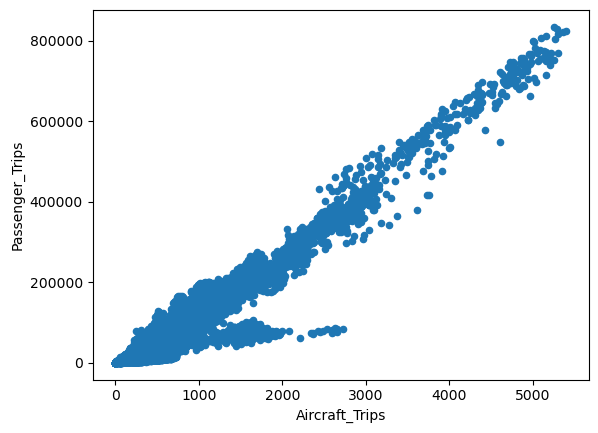

In [53]:
# What is the relationship between passenger trips and aircraft trips?
flights.plot(x='Aircraft_Trips', y='Passenger_Trips', kind='scatter')

<Axes: ylabel='City1,City2'>

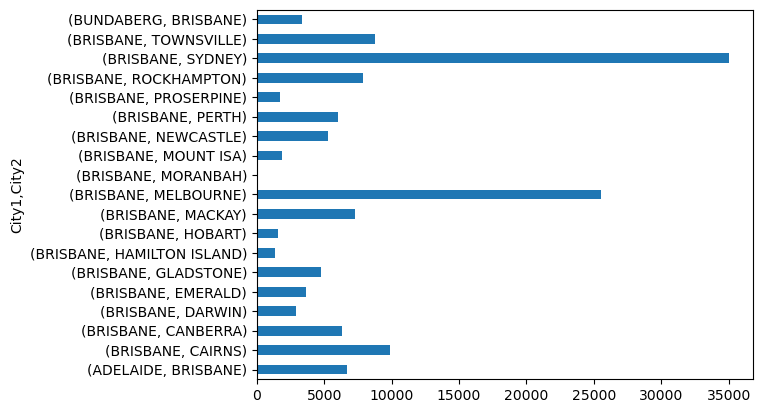

In [57]:
# How many people flew on each Brisbane route in 2018?
Brisbane_flights_2018 = flights[((flights.City1 == 'BRISBANE') | (flights.City2 == 'BRISBANE')) & (flights.Year == 2018)]
Brisbane_flights_2018_total = Brisbane_flights_2018.groupby(['City1', 'City2']).Aircraft_Trips.sum()
Brisbane_flights_2018_total.plot(kind='barh')